## 머신러닝
# 결정트리 (Decision Tree)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Iris 데이터 불러오기

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 해결하려는 문제는 무엇인가?
> sepal_width 와 petal_length 속성값을 이용해 versicolor/virginica 품종을 맞추고(예측하고) 싶다

In [68]:
X = iris.data[50:, [1,2]]
X.shape

(100, 2)

In [69]:
y = np.array([0]*50 + [1]*50) # 0: versicolor, 1: virginica
y                             # 목표값이 0과 1로 되어있는지 확인하자

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Text(0, 0.5, 'petal_length')

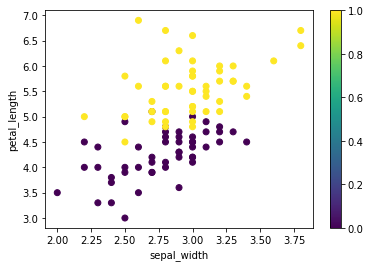

In [70]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()
plt.xlabel('sepal_width')
plt.ylabel('petal_length')

### 결정트리 적용

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model = DecisionTreeClassifier()

In [25]:
model.fit(X, y)

DecisionTreeClassifier()

In [26]:
y_pred = model.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
model.score(X, y) # 옳게 분류한 비율점수

0.98

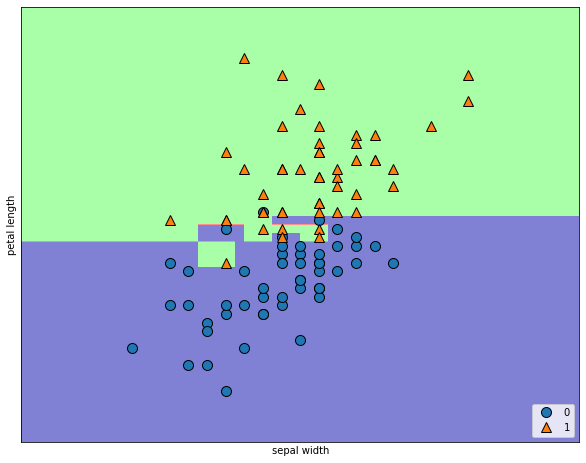

In [31]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('sepal width')
plt.ylabel('petal length')
plt.legend(loc=4)

### 트리 그리기
1. 아나콘다 프롬프터에서, "pip install graphviz" 실행
2. http://www.graphviz.org 에서 "graphviz-3.0.0 (64-bit) EXE installer" 다운로드 및 설치
> 설치시, PATH 에 추가 옵션 설정 (설정시 아래 3번은 자동으로 처리됨)
3. "C:\Program Files\Graphviz\bin" 을 윈도우 PATH 에 추가
4. 기존에 떠 있던 아나콘다 프롬프트를 모두 닫고 jupyter notebook 재실행

In [33]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree.dot', class_names=iris.target_names,
                feature_names=['sepal_width','petal_length'], impurity=False, filled=True)

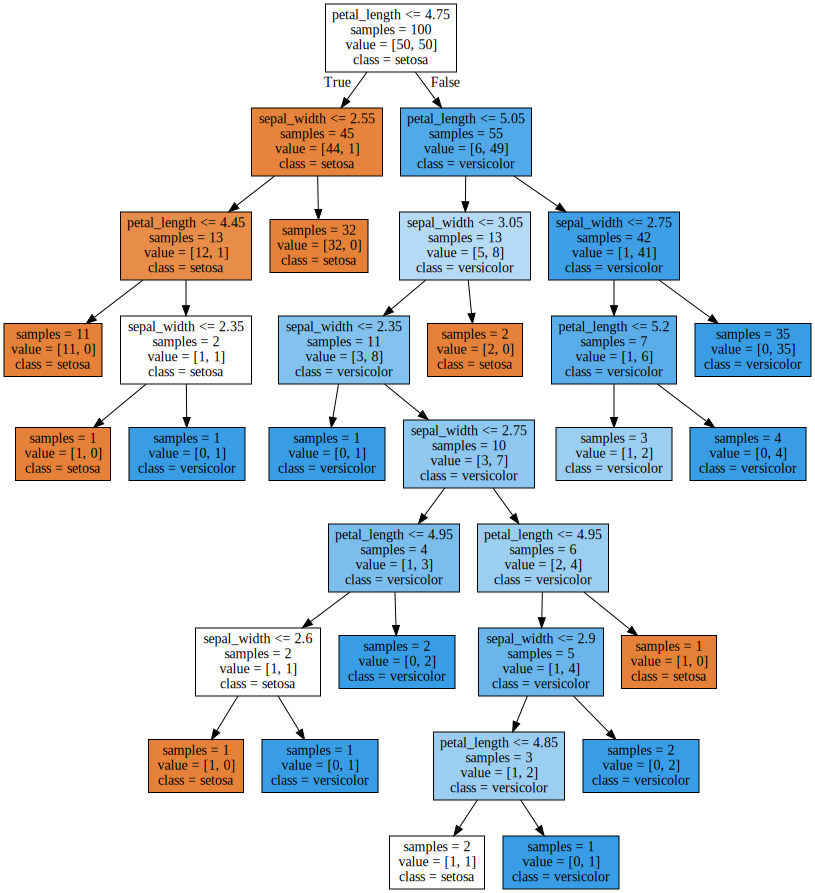

In [34]:
import graphviz

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [35]:
## 파일로 저장
dot=graphviz.Source(dot_graph)
dot.format='png'
dot.render(filename='tree')

'tree.png'

### max_depth 옵션
- 나무의 크기를 제한한다

In [37]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X, y)
model.score(X, y)

0.93

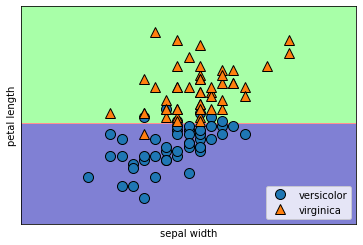

In [39]:
mglearn.plots.plot_2d_classification(model, X, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('sepal width')
plt.ylabel('petal length')
plt.legend(['versicolor', 'virginica'], loc=4)

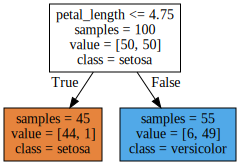

In [40]:
export_graphviz(model, out_file='tree.dot', class_names=iris.target_names,
                feature_names=['sepal_width','petal_length'], impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

- 깊이를 3으로 설정

In [47]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)
model.score(X, y)

0.95

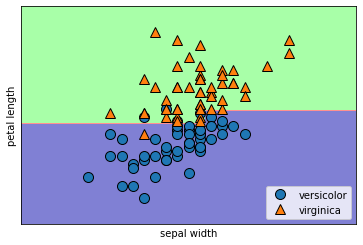

In [48]:
mglearn.plots.plot_2d_classification(model, X, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('sepal width')
plt.ylabel('petal length')
plt.legend(['versicolor', 'virginica'], loc=4)

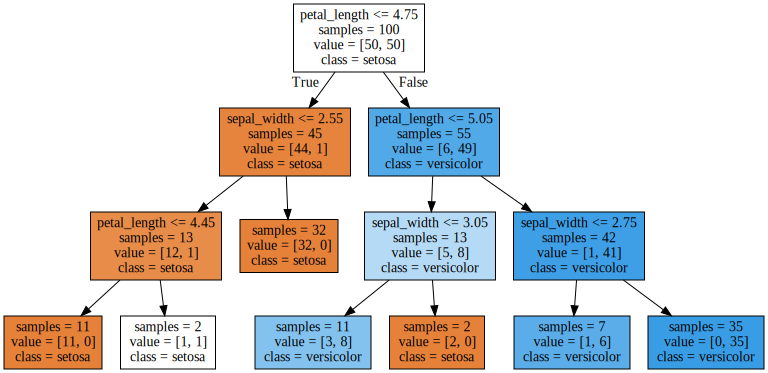

In [49]:
export_graphviz(model, out_file='tree.dot', class_names=iris.target_names,
                feature_names=['sepal_width','petal_length'], impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### DecisionTreeClassifier 주요 옵션
- max_depth
- max_leaf_nodes : 총 잎노드의 갯수를 제한한다
- min_samples_split : 만일 10이라면, 노드의 샘플 갯수가 10이상이 되어야 분기를 한다.
- min_samples_leaf : 10이라면, 잎노드의 샘플 갯수는 10이상이 되도록 만든다.
- max_features : 분기를 할 때 고려하는 속성의 갯수이다. 만일 2라면 판단할 속성을 고를때 랜덤하게 속성 2개만 뽑아 그 중에서 기준을 세운다.

In [65]:
model = DecisionTreeClassifier(max_leaf_nodes=10)
model.fit(X, y)
model.score(X, y)

0.96

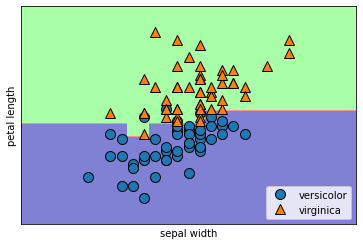

In [66]:
mglearn.plots.plot_2d_classification(model, X, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('sepal width')
plt.ylabel('petal length')
plt.legend(['versicolor', 'virginica'], loc=4)

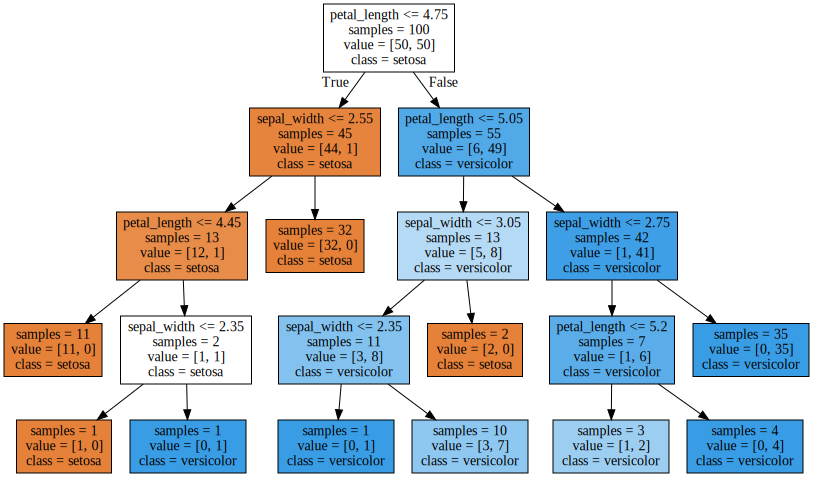

In [67]:
export_graphviz(model, out_file='tree.dot', class_names=iris.target_names,
                feature_names=['sepal_width','petal_length'], impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

### 과적합(Over-Fitting) 이슈
- max_depth 값이 클수록 트리와 경계선이 복잡해진다
- 경계선이 무한히 복잡해질수록 **예측능력** 도 좋아질까?
- 모델은 너무 단순해도 좋지 않지만, **너무 복잡해도 문제**가 발생한다